# Audio Classification 1 D CNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [3]:
# train=np.load("audio_train.npy")
# test=np.load("audio_test.npy")

from google.colab import drive
drive.mount('/content/gdrive')
train=np.load("gdrive/My Drive/audio-classification/audio_train.npy")
test=np.load("gdrive/My Drive/audio-classification/audio_test.npy")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
train.shape

(942, 30000)

In [5]:
train

array([[-0.92577249, -0.66291571, -0.26374164, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.94556701,  1.11562371,  1.10488427, ...,  0.        ,
         0.        ,  0.        ],
       [-0.01025403, -0.01226821, -0.01267925, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.00239253,  1.10180998,  1.03759027, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00936416, -0.01141811, -0.01222591, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87232733, -0.1913518 ,  0.57717735, ...,  0.        ,
         0.        ,  0.        ]])

In [6]:
#train_labels=pd.read_csv("labels_train.csv",usecols=['label']).to_numpy()
train_labels=pd.read_csv("gdrive/My Drive/audio-classification/labels_train.csv",usecols=['label']).to_numpy()

In [ ]:
print(train_labels)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(train, train_labels, test_size=0.40, random_state=101)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(565, 30000)
(377, 30000)
(565, 1)
(377, 1)


In [10]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(565, 30000, 1)
(377, 30000, 1)
(565, 1)
(377, 1)


In [12]:
X_train[0].shape

(30000, 1)

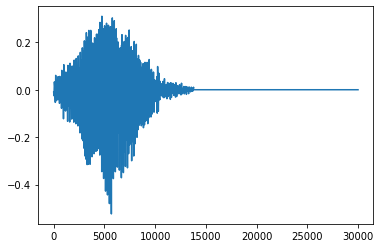

In [13]:
plt.plot(train[2])

In [14]:
model = models.Sequential()
model.add(layers.Conv1D(32, 3, activation='relu',strides=10 ,input_shape=X_train[0].shape))
model.add(layers.MaxPooling1D((2)))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.MaxPooling1D((2)))
model.add(layers.Conv1D(64, 3, activation='relu'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 3000, 32)          128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1500, 32)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1498, 64)          6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 749, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 747, 64)           12352     
Total params: 18,688
Trainable params: 18,688
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 3000, 32)          128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1500, 32)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1498, 64)          6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 749, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 747, 64)           12352     
_________________________________________________________________
flatten (Flatten)            (None, 47808)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test,y_test))

Epoch 1/10
18/18 [==============================] - 4s 221ms/step - loss: 2.2503 - accuracy: 0.1593 - val_loss: 2.1774 - val_accuracy: 0.1512
Epoch 2/10
18/18 [==============================] - 4s 211ms/step - loss: 2.0425 - accuracy: 0.2425 - val_loss: 1.9536 - val_accuracy: 0.2865
Epoch 3/10
18/18 [==============================] - 4s 211ms/step - loss: 1.7956 - accuracy: 0.3310 - val_loss: 1.8732 - val_accuracy: 0.3263
Epoch 4/10
18/18 [==============================] - 4s 209ms/step - loss: 1.5499 - accuracy: 0.4460 - val_loss: 1.6987 - val_accuracy: 0.4138
Epoch 5/10
18/18 [==============================] - 4s 212ms/step - loss: 1.2989 - accuracy: 0.5239 - val_loss: 2.0309 - val_accuracy: 0.4032
Epoch 6/10
18/18 [==============================] - 4s 209ms/step - loss: 1.2389 - accuracy: 0.5345 - val_loss: 1.7619 - val_accuracy: 0.3952
Epoch 7/10
18/18 [==============================] - 4s 210ms/step - loss: 1.1090 - accuracy: 0.6035 - val_loss: 1.5456 - val_accuracy: 0.4881
Epoch 

In [19]:
test.shape

(558, 30000)

In [20]:
test = test.reshape(test.shape[0],test.shape[1],1)

In [21]:
test.shape

(558, 30000, 1)

In [22]:
predictions = model.predict(test)

In [23]:
predictions

array([[ 3.7722549e+00,  4.3473318e-01, -2.4979927e+01, ...,
        -4.1176000e+00, -1.9260510e+00,  8.0592194e+00],
       [ 8.5760832e+00, -2.7743933e+00, -2.1368063e+01, ...,
        -2.1831021e+00,  4.9085350e+00,  1.6280140e+01],
       [-1.0036239e+01,  7.2318427e-02, -1.9744701e+01, ...,
         3.4553967e+00,  4.5474756e-01, -2.5885391e+00],
       ...,
       [-4.7544175e-01, -1.8839976e-01, -3.1977909e+00, ...,
         7.0961726e-01, -3.0166882e-01, -1.2948968e-01],
       [ 3.3175996e-01, -1.4759561e-01, -2.0730507e+00, ...,
         5.1228517e-01, -9.7039640e-03, -1.5033744e-02],
       [ 1.1985413e+00,  4.4485536e+00, -2.3174101e+01, ...,
         3.3234684e+00, -3.0366640e+00,  5.7292299e+00]], dtype=float32)

In [24]:
results = []
for i in range(len(predictions)):
    temp = []
    temp.append(i)
    temp.append(np.argmax(predictions[i]))
    results.append(temp)

In [ ]:
results

In [26]:
results = pd.DataFrame(results,columns=['id','label'])

In [27]:
results

,id,label
0,0,5
1,1,9
2,2,4
3,3,5
4,4,4
...,...,...
553,553,9
554,554,5
555,555,5
556,556,6


In [28]:
#results.to_csv("Results.csv",index=False)

from google.colab import files

results.to_csv('Results.csv', sep=',',  index = False)

files.download('Results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>